# Plany proste

Przykładowe badanie: chcemy zbadać wpływ bycia w izolacji na depresyjność. W tym celu jedną grupę osób zamykamy na kwarantannie na tydzień, a następnie porównujemy ją z grupą kontrolną pod względem depresyjności.

In [1]:
from IPython.core.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
def add_errors(df, how_many=10, how_much=2):
    ndf = pd.DataFrame()
    for ind in df.index:
        nrow = df.iloc[ind]
        f1, f2, outcome = [], [], []
        f1 = [nrow[0]] * how_many
        f2 = [nrow[1]] * how_many

        for i in range(how_many):
            outcome.append(nrow[2] + (np.random.normal() * how_much))

        d = {
            nrow.index[0]: f1,
            nrow.index[1]: f2,
            nrow.index[2]: outcome
        }
        
        ndf = pd.concat([ndf, pd.DataFrame(d)])
    

    ndf = ndf.reset_index(drop=True)

    return ndf

            
def show_plot(x, y, z, df, fig_dims=(7,5)):
    
    if z:
        groups = [x, z]
    else:
        groups = x
    
    res = df.groupby(groups)[y].describe().round(2).iloc[:, 1:3]
    display(res)
    
    plot1 = sns.catplot(data=df, x=x, y=y, kind='swarm')
    display(plot1)

    fig, ax = plt.subplots(figsize=fig_dims)

    plot2 = sns.pointplot(x=x, y=y, hue=z, data=df, ax=ax, capsize=.05, ci='sd')
    display(plot2)

## Dane

In [3]:
d = {
    'kwarantanna': ['tak', 'tak', 'nie', 'nie'],
    'tv': ['tak', 'nie', 'tak', 'nie'],
    'depresyjność': [10.12, 10.7, 4.45, 4.55]
}
df = pd.DataFrame(d)
df = add_errors(df)

display(HTML(df.iloc[:, [0,2]].round(1).reset_index(drop=True).to_html()))

,kwarantanna,depresyjność
0,tak,11.3
1,tak,12.0
2,tak,9.9
3,tak,16.7
4,tak,11.0
5,tak,11.9
6,tak,10.5
7,tak,5.6
8,tak,7.0
9,tak,7.2


## Przykład 1

,mean,std
kwarantanna,,
nie,4.10,2.12
tak,10.74,2.37


<AxesSubplot:xlabel='kwarantanna', ylabel='depresyjność'>

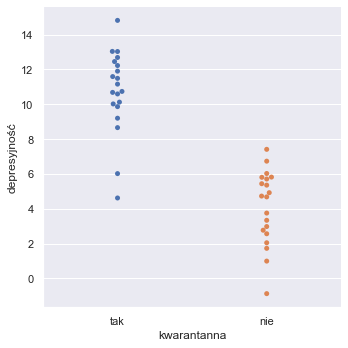

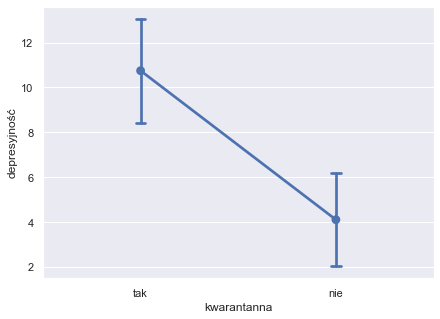

In [4]:
d = {
    'kwarantanna': ['tak', 'tak', 'nie', 'nie'],
    'tv': ['tak', 'nie', 'tak', 'nie'],
    'depresyjność': [10.12, 10.7, 4.45, 4.55]
}
df = pd.DataFrame(d)
df = add_errors(df)


show_plot('kwarantanna', 'depresyjność', None, df)



## Przykład 2

,mean,std
kwarantanna,,
nie,6.97,1.90
tak,6.33,2.24


<AxesSubplot:xlabel='kwarantanna', ylabel='depresyjność'>

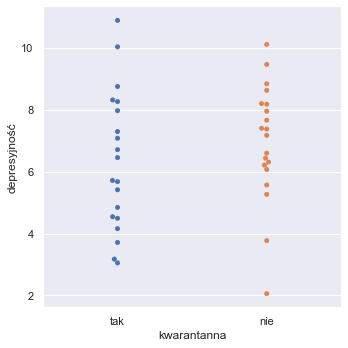

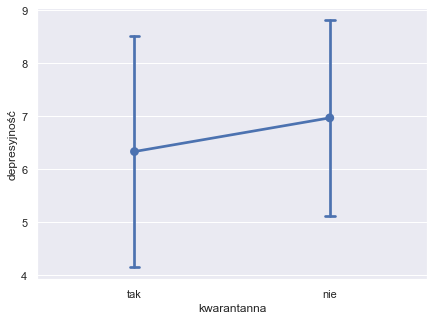

In [5]:
d = {
    'kwarantanna': ['tak', 'tak', 'nie', 'nie'],
    'pies': ['tak', 'nie', 'tak', 'nie'],
    'depresyjność': [6.12, 6.5, 7, 6.7]
}
df = pd.DataFrame(d)
df = add_errors(df)
df = df.reset_index(drop=True)
show_plot('kwarantanna', 'depresyjność', None, df)

## Przykład 3

,mean,std
kwarantanna,,
nie,14.60,1.75
tak,5.83,2.33


<AxesSubplot:xlabel='kwarantanna', ylabel='depresyjność'>

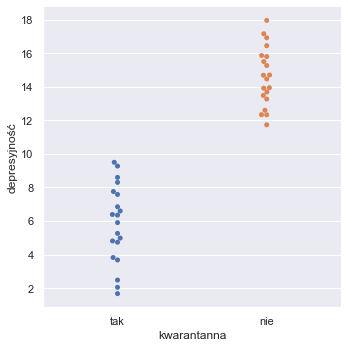

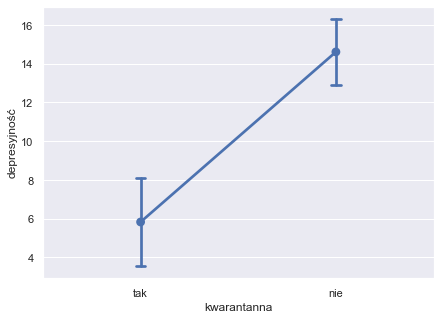

In [6]:
d = {
    'kwarantanna': ['tak', 'tak', 'nie', 'nie'],
    'pies': ['tak', 'nie', 'tak', 'nie'],
    'depresyjność': [6.12, 6.5, 14, 14]
}
df = pd.DataFrame(d)
df = add_errors(df)

show_plot('kwarantanna', 'depresyjność', None, df)

## Przykład 4

mean   std
kwarantanna tv              
nie         nie   8.22  1.61
            tak   8.45  1.38
tak         nie   7.78  2.39
            tak  18.12  1.84

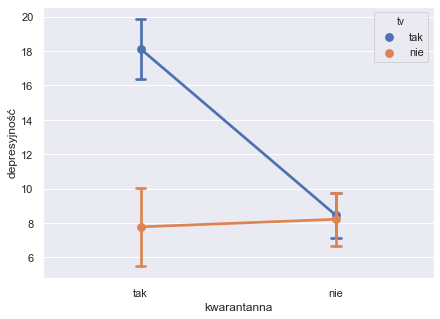

In [93]:
d = {
    'kwarantanna': ['7 dni', '3 dni', 'kontrola'],
    'depresyjność': [18, 8, 8.45]
}
df = pd.DataFrame(d)

df = add_errors(df)

show_plot('kwarantanna', 'depresyjność', 'tv', df)

Efekty proste:

- Efekt prosty oglądania tv u osób w kwarantannie
- Brak efektu prostego oglądania tv u osób bez kwarantanny
- Efekt prosty kwarantanny u osób oglądających tv
- Brak efektu prostego kwarantanny u osób nie oglądających tv

Efekty główne

- Efekt główny oglądania tv
- Efekt główny kwarantanny

Interakcja

- Efekt interakcji kwarantanny i tv

,mean,std
kwarantanna,,
nie,8.33,1.47
tak,12.95,5.70


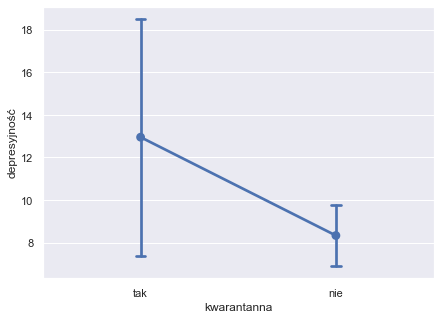

In [94]:
show_plot('kwarantanna', 'depresyjność', None, df)

,mean,std
tv,,
nie,8.00,2.00
tak,13.29,5.21


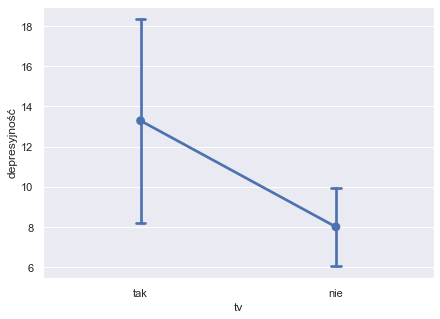

In [95]:
show_plot('tv', 'depresyjność', None, df)

## Przykład 3

mean   std
kwarantanna tv              
nie         nie   4.22  1.93
            tak   9.86  2.17
tak         nie  10.58  1.72
            tak  16.01  1.85

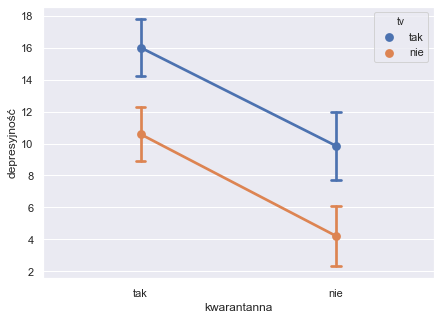

In [61]:
d = {
    'kwarantanna': ['tak', 'tak', 'nie', 'nie'],
    'tv': ['tak', 'nie', 'tak', 'nie'],
    'depresyjność': [16, 10, 10, 4]
}
df = pd.DataFrame(d)

df = add_errors(df)

show_plot('kwarantanna', 'depresyjność', 'tv', df)

Efekty proste:

- Efekt prosty oglądania tv u osób w kwarantannie
- Efekt prosty oglądania tv u osób bez kwarantanny
- Efekt prosty kwarantanny u osób oglądających tv
- Efekt prosty kwarantanny u osób nie oglądających tv

Efekty główne

- Efekt główny oglądania tv
- Efekt główny kwarantanny

Interakcja

- Brak efektu interakcji kwarantanny i tv

## Przykład 4

mean   std
kwarantanna tv              
nie         nie   8.85  2.05
            tak  16.57  1.85
tak         nie   8.27  1.71
            tak  16.52  1.54

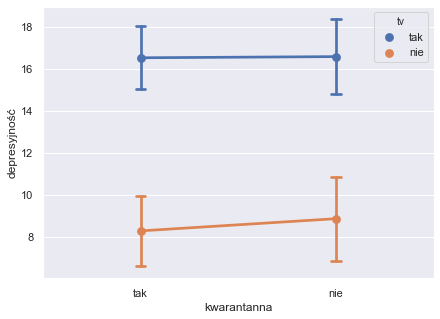

In [54]:
d = {
    'kwarantanna': ['tak', 'tak', 'nie', 'nie'],
    'tv': ['tak', 'nie', 'tak', 'nie'],
    'depresyjność': [16, 8, 16.1, 8.5]
}
df = pd.DataFrame(d)
df = add_errors(df)
show_plot('kwarantanna', 'depresyjność', 'tv', df)

Efekty proste:

- Efekt prosty oglądania tv u osób w kwarantannie
- Efekt prosty oglądania tv u osób bez kwarantanny
- Brak efektu kwarantanny u osób oglądających tv
- Brak efektu prostego kwarantanny u osób nie oglądających tv

Efekty główne

- Efekt główny oglądania tv
- Brak efektu głównego kwarantanny

Interakcja

- Brak efektu interakcji kwarantanny i tv

## Przykład 5

mean   std
kwarantanna tv              
nie         nie   7.87  1.78
            tak  15.74  2.36
tak         nie   8.21  1.73
            tak   1.95  2.03

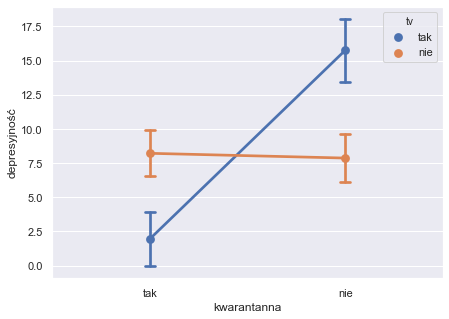

In [67]:
d = {
    'kwarantanna': ['tak', 'tak', 'nie', 'nie'],
    'tv': ['tak', 'nie', 'tak', 'nie'],
    'depresyjność': [2, 8, 16, 8]
}
df = pd.DataFrame(d)

df = add_errors(df)

show_plot('kwarantanna', 'depresyjność', 'tv', df)

Efekty proste:

- Efekt prosty oglądania tv u osób w kwarantannie
- Efekt prosty oglądania tv u osób bez kwarantanny
- Efekt prosty kwarantanny u osób oglądających tv
- Brak efektu prostego kwarantanny u osób nie oglądających tv

Efekty główne

- Brak efektu głównego oglądania tv
- Efekt główny kwarantanny

Interakcja

- Efekt interakcji kwarantanny i tv